GroupGal : 83093
StellarMasses : 114662
['CATAID', 'uminusr', 'logmstar']
EnvMeasures : 67996
EnvMeasures : 40574
visualMorph : 38795
['CATAID', 'ELLIPTICAL', 'ELLIPTICAL_CODE', 'HUBBLE_TYPE_SPD', 'HUBBLE_TYPE_SPD_CODE', 'HUBBLE_TYPE_LSK', 'HUBBLE_TYPE_LSK_CODE', 'HUBBLE_TYPE_ASGR', 'HUBBLE_TYPE_ASGR_CODE', 'HUBBLE_TYPE', 'HUBBLE_TYPE_CODE', 'ASGR_DISTURBED', 'ASGR_NORMAL', 'ASGR_UNSURE', 'ASGR_CLASSIFIERS', 'ASGR_PROBDIST', 'P_EL', 'P_CS', 'P_EL_DEBIASED', 'P_CS_DEBIASED', 'URL_IMG']


['CATAID', 'RA_1', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'RA_2', 'DEC', 'Z_TONRY', 'nQ', 'M_r', 'DistanceToEdge', 'Completeness', 'DistanceTo5nn', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag', 'CountInCyl', 'CountInCylErr', 'CountInCylFlag', 'AGEDenPar', 'AGEErr', 'AGEScale', 'AGEDenParFlag']
GroupEnvMeasures
['CATAID', 'RA_1', 'Dec', 'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'GroupID', 'RankIterCen', 'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG', 'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen', 'RA_2', 'DEC', 'Z_TONRY', 'nQ', 'M_r', 'DistanceToEdge', 'Completeness', 'DistanceTo5nn', 'SurfaceDensity', 'SurfaceDensityErr', 'SurfaceDensityFlag', 'CountInCyl', 'CountInCylErr', 'CountInCylFlag', 'AGEDenPar', 'AGEErr', 'AGEScale', 'A

GalCounts
Index(['GroupID', 'ELLIPTICAL_CODE', 'CountInCyl', 'DistanceTo5nn',
       'SurfaceDensity', 'AGEDenPar', 'Counts'],
      dtype='object')
      GroupID  ELLIPTICAL_CODE  CountInCyl  DistanceTo5nn  SurfaceDensity  \
0      100006                1   16.318500       0.465769       10.266173   
1      100006                2   16.318500       0.465769       10.266173   
2      100006               10   16.318500       0.465769       10.266173   
3      100017                1    8.676934       0.417033       14.221966   
4      100017               10    8.676934       0.417033       14.221966   
...       ...              ...         ...            ...             ...   
2667   307922               10    1.071000       2.282000        0.327000   
2668   307925                1    4.656000       1.020000        1.590000   
2669   307925               10    4.656000       1.020000        1.590000   
2670   307954                1    1.000000       8.145000        0.024000   
2671

Pearson Correlation x: SurfaceDensity y: Red-Percent Correlation : -0.5038695343462071 T-Test : 2.0109005333478345e-11
Spearman Correlation x: SurfaceDensity y: Red-PercentCorrelation : -0.5571092701821512 T-Test : 4.255585256483106e-14
Linear Regresion x: SurfaceDensity y: Red-Percent slope : -21.2002933078933 Intercept 79.07471607930177 Correlation -0.5038695343462071 Wald test 2.010900533347827e-11 2.9286430206459575
Pearson Correlation x: AGEDenPar y: Red-Percent Correlation : -0.28440058265169843 T-Test : 0.00032044230443073083
Spearman Correlation x: AGEDenPar y: Red-PercentCorrelation : -0.28703450811101056 T-Test : 0.00028016715811996363
Linear Regresion x: AGEDenPar y: Red-Percent slope : -22.200821464889675 Intercept 71.11709573748227 Correlation -0.2844005826516983 Wald test 0.00032044230443073176 6.03064047533671


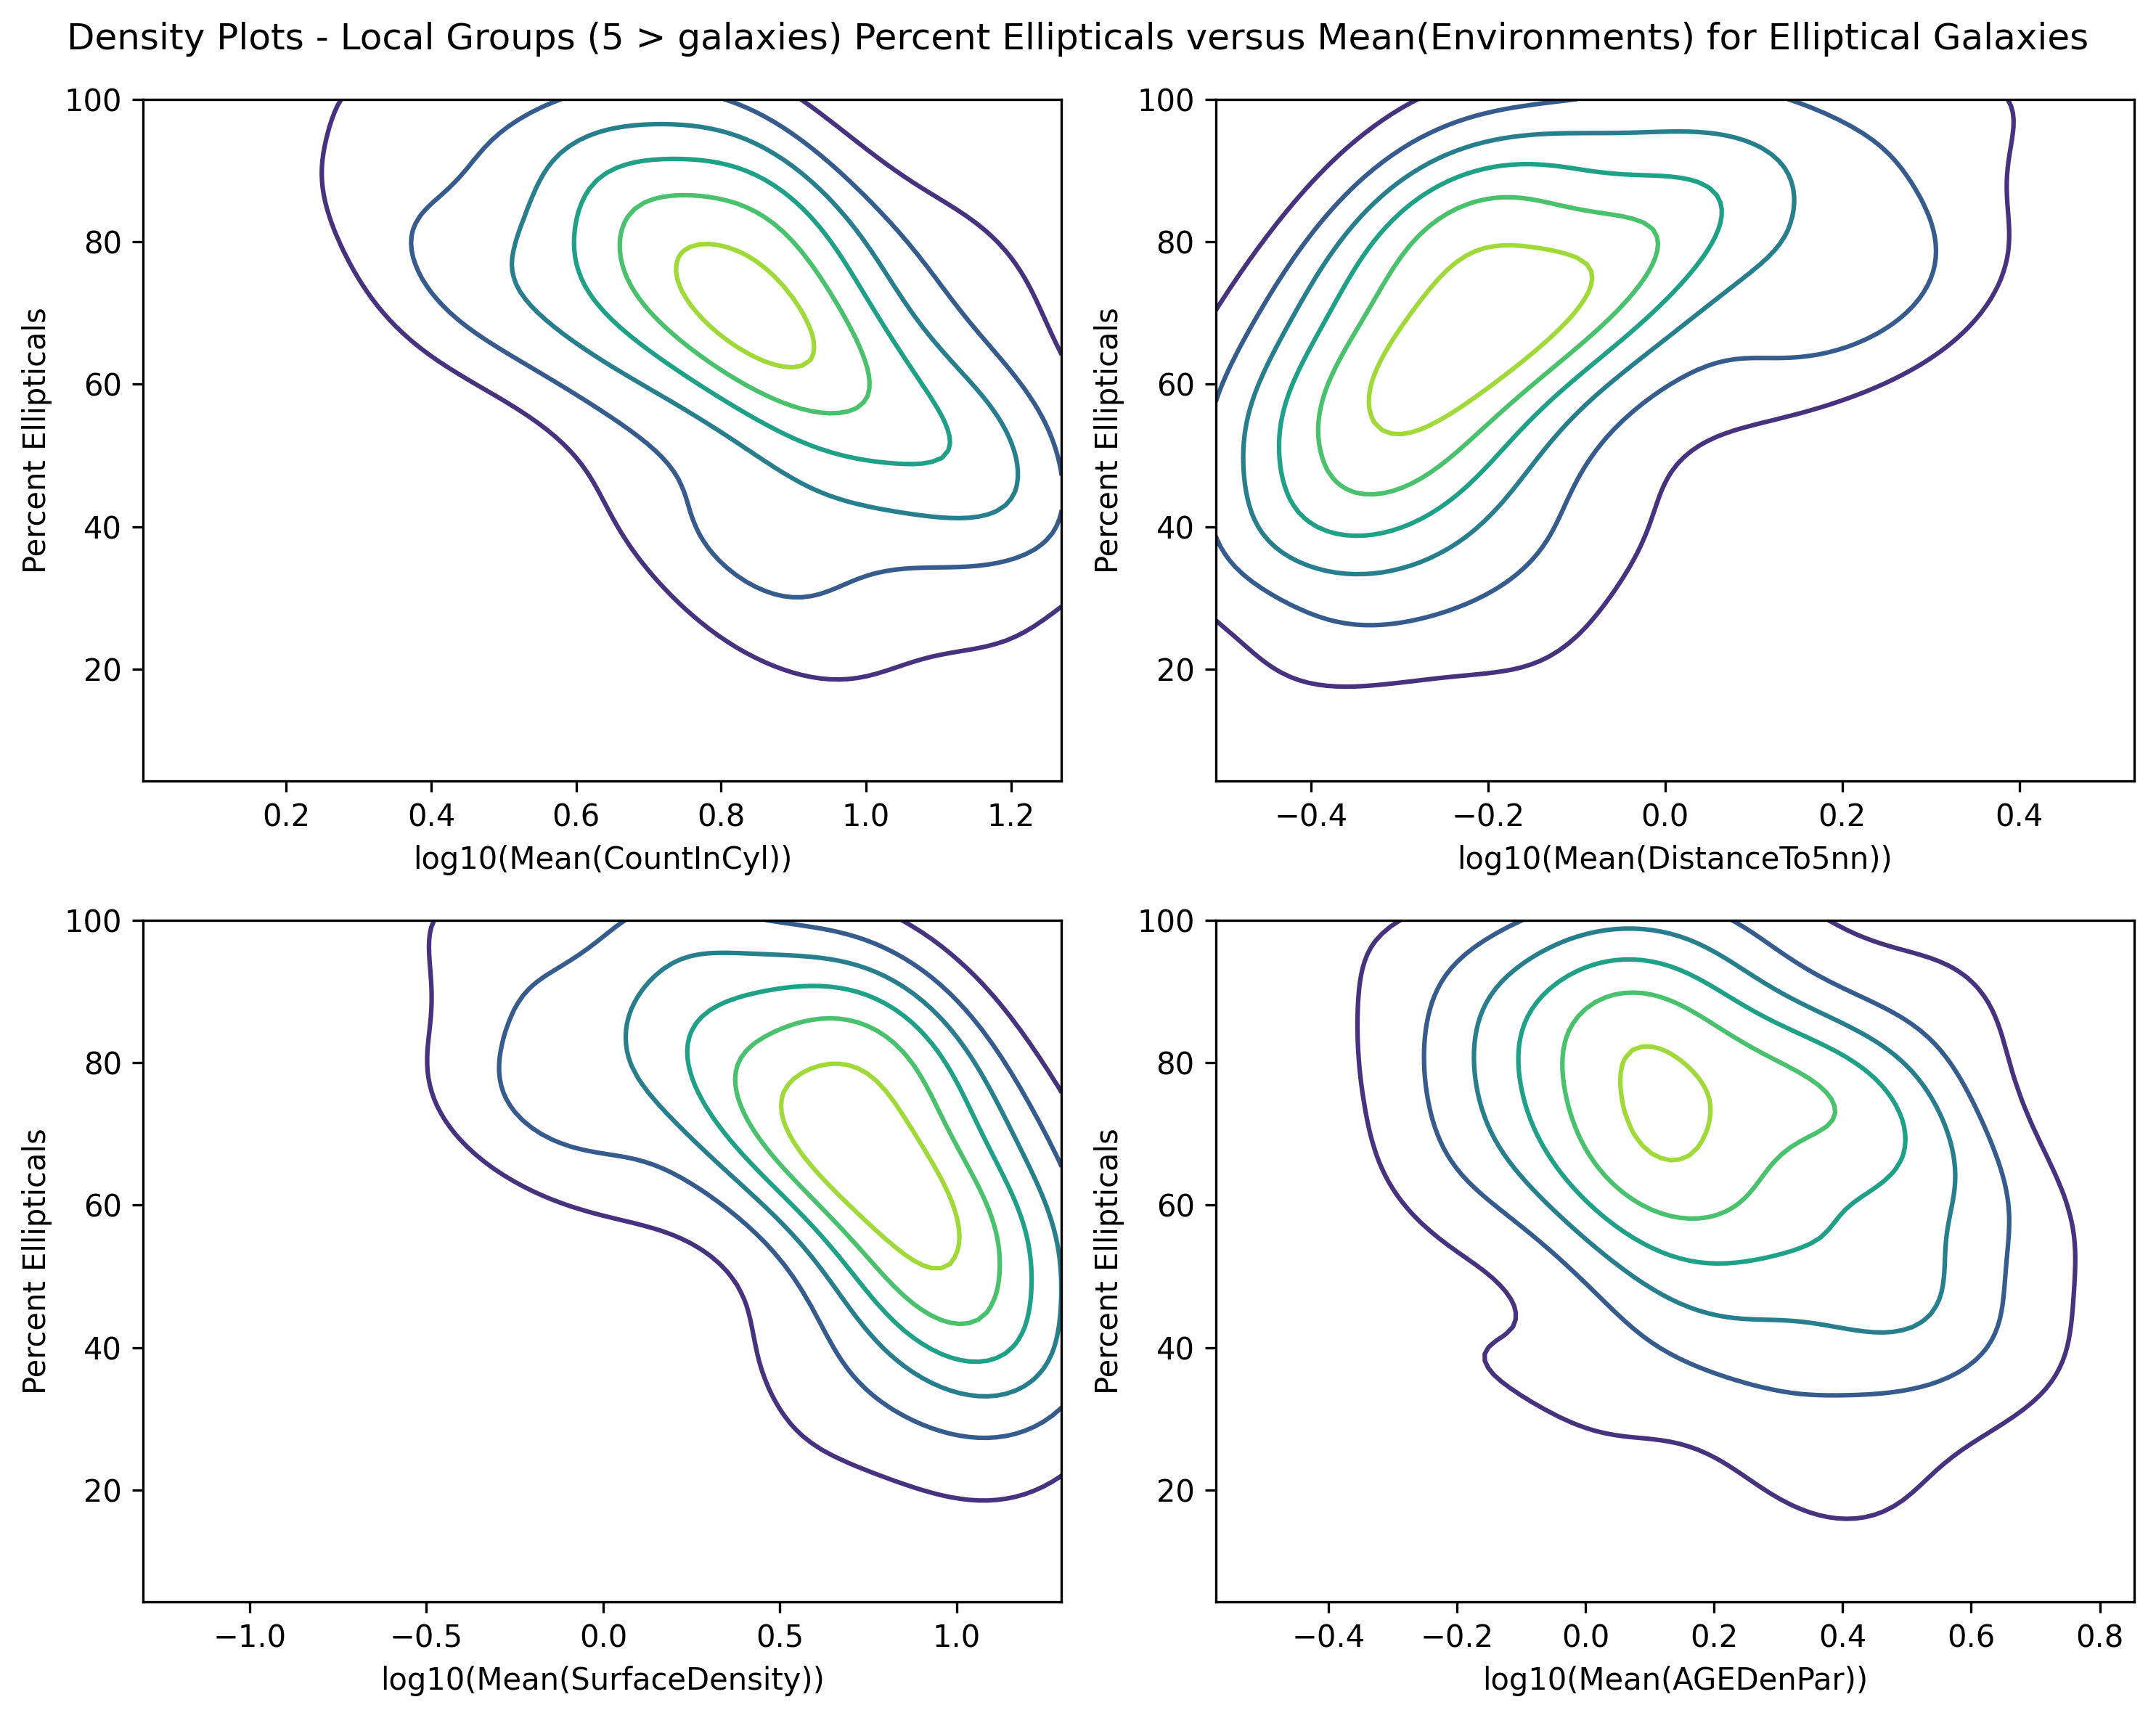

GEMsubset
Index(['GroupID', 'ELLIPTICAL_CODE', 'CountInCyl_x', 'DistanceTo5nn_x',
       'SurfaceDensity_x', 'AGEDenPar_x', 'Counts', 'CATAID', 'RA_1', 'Dec',
       'Z', 'Rpetro', 'DM_100_25_75', 'SURVEY_CODE', 'SigErr', 'RankIterCen',
       'SepIterCen', 'CoSepIterCen', 'AngSepIterCen', 'RankBCG', 'SepBCG',
       'CoSepBCG', 'AngSepBCG', 'RankCen', 'SepCen', 'CoSepCen', 'AngSepCen',
       'RA_2', 'DEC', 'Z_TONRY', 'nQ', 'M_r', 'DistanceToEdge', 'Completeness',
       'DistanceTo5nn_y', 'SurfaceDensity_y', 'SurfaceDensityErr',
       'SurfaceDensityFlag', 'CountInCyl_y', 'CountInCylErr', 'CountInCylFlag',
       'AGEDenPar_y', 'AGEErr', 'AGEScale', 'AGEDenParFlag', 'uminusr',
       'logmstar'],
      dtype='object')
Pearson Correlation x: CountInCyl y: uminusr : -0.0211935934059329 T-Test : 0.6157995803503785
Spearman Correlation x: CountInCyl y: uminusr : 0.005294979163911476 T-Test : 0.9002394193425973
Linear Regresion x: CountInCyl y: uminusr slope : -0.04885249271914256 Interc

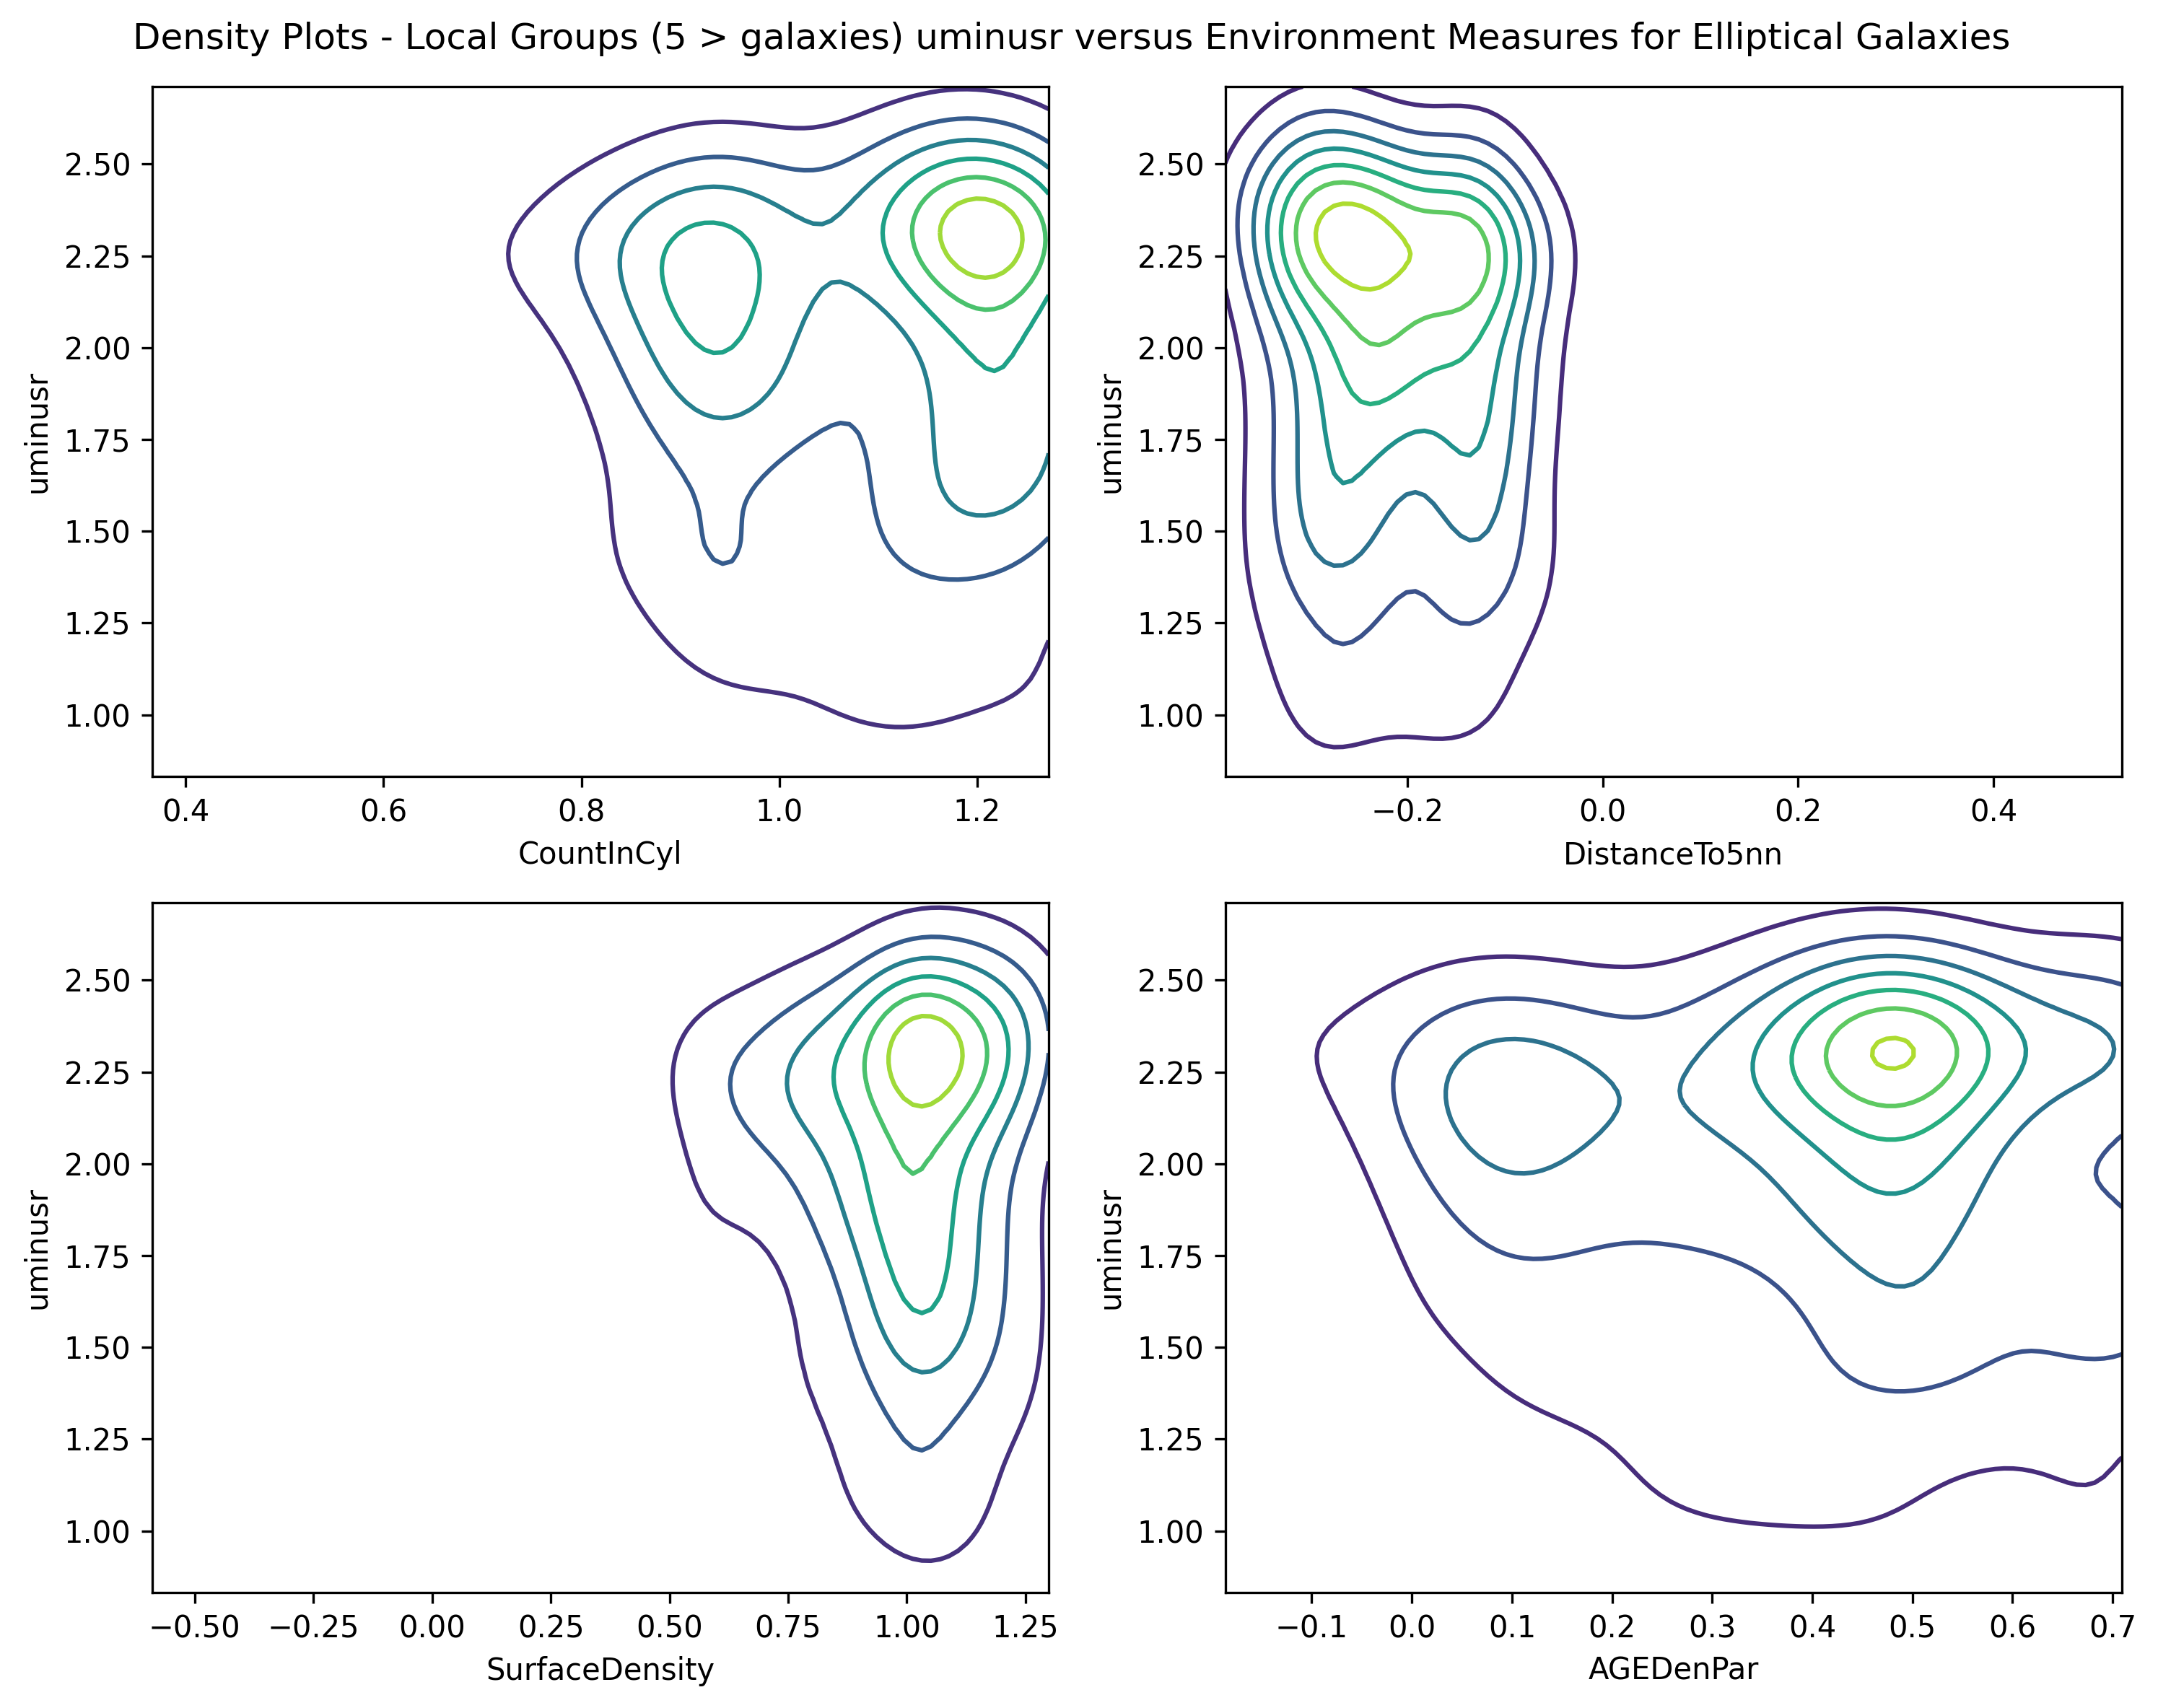

Pearson Correlation x: CountInCyl y: logmstar : -0.024628077716553808 T-Test : 0.5597887014529668
Spearman Correlation x: CountInCyl y: logmstar : -0.013684155376574128 T-Test : 0.7459486428865014
Linear Regresion x: CountInCyl y: logmstar slope : -0.09485421800957212 Intercept 10.075789004354117 Correlation -0.024628077716553853 Wald test 0.5597887014532635 0.16255972393461
Pearson Correlation x: DistanceTo5nn y: logmstar : -0.022193075438720032 T-Test : 0.599247292663787
Spearman Correlation x: DistanceTo5nn y: logmstar : -0.08002885964199229 T-Test : 0.057733133210203895
Linear Regresion x: DistanceTo5nn y: logmstar slope : -0.13252614178335778 Intercept 9.949249038010834 Correlation -0.022193075438720056 Wald test 0.5992472926641355 0.2520551968515523
Pearson Correlation x: SurfaceDensity y: logmstar : -0.005959017161794707 T-Test : 0.8878065030685669
Spearman Correlation x: SurfaceDensity y: logmstar : 0.037909180330990694 T-Test : 0.36928244399150156
Linear Regresion x: SurfaceDe

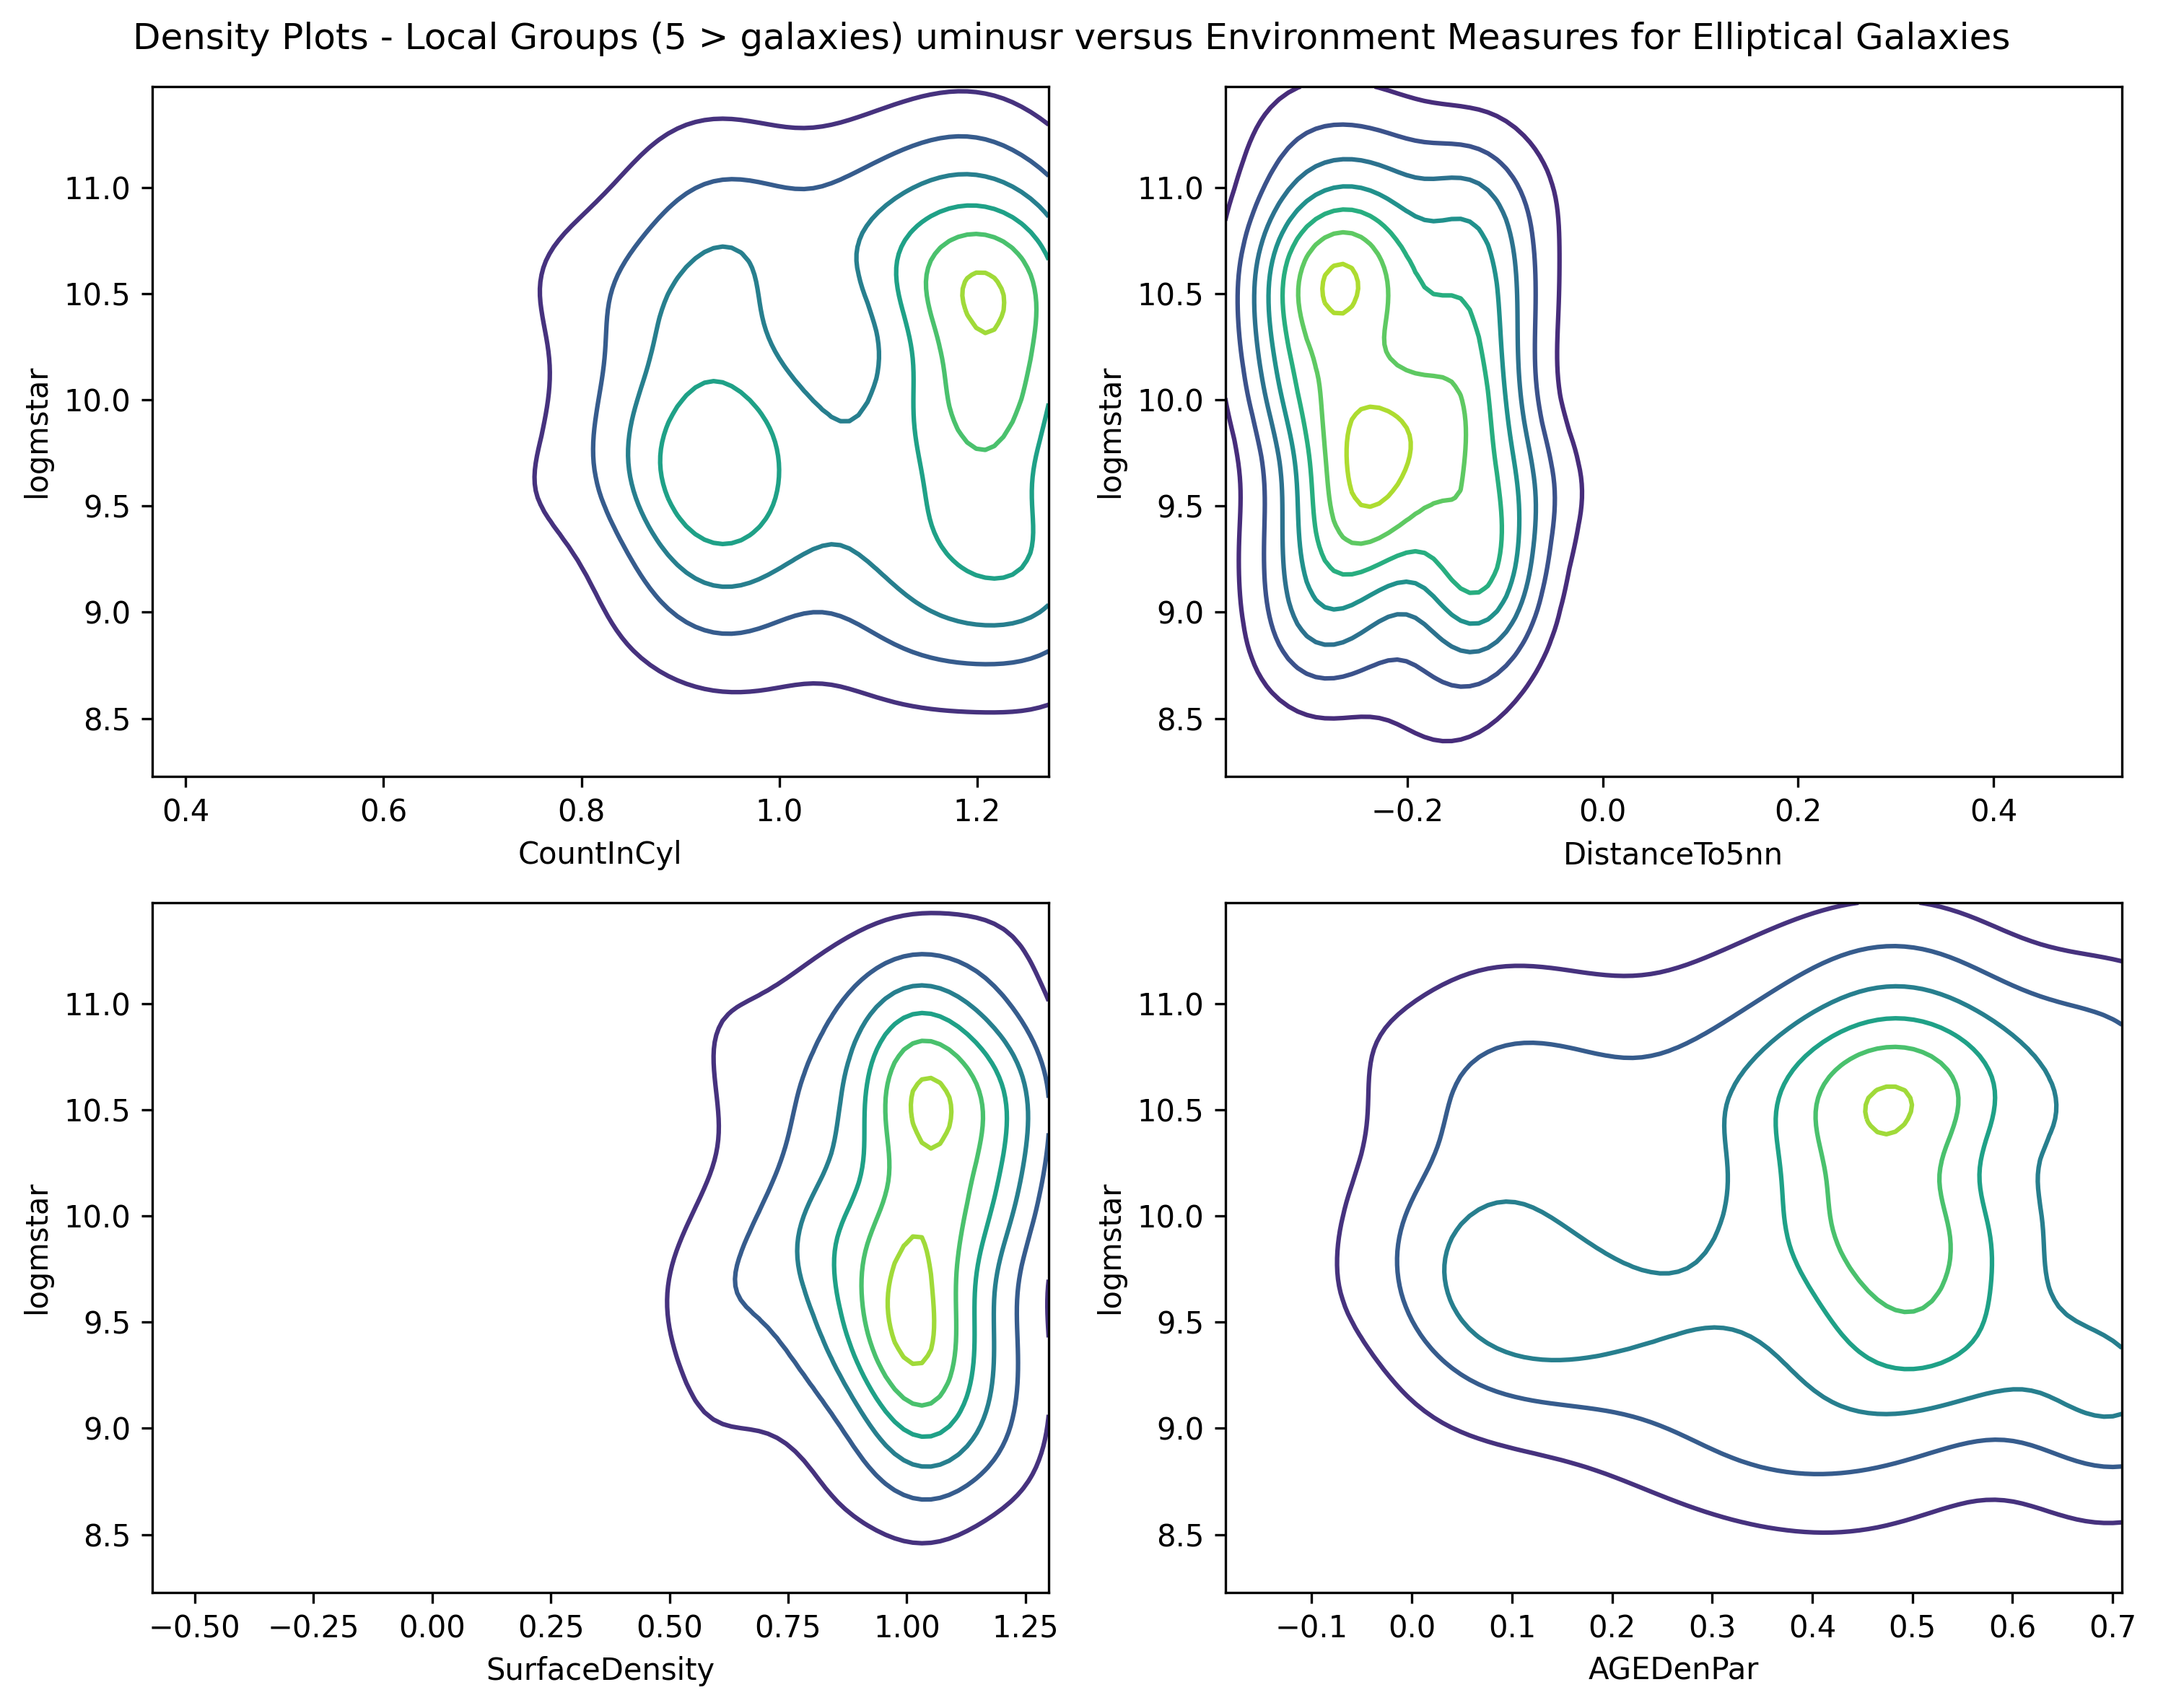

In [41]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import statistics as st

#ForGroup = Table.read('../../GAMA_DATA/G3CFoFGroupv10.fits')
#print(f"ForGroup : {len(ForGroup)}")
## Clean Data

GroupGal = Table.read('../../GAMA_DATA/G3CGalv10.fits')
# Clean data
GroupGal = GroupGal[GroupGal['GroupID'] > 0 ]
print(f"GroupGal : {len(GroupGal)}")

StellarMasses = Table.read('../../GAMA_DATA/StellarMassesv19.fits')
# Clean Data
#StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.001]
#StellarMasses = StellarMasses[StellarMasses['metal'] > 0.001]


StellarMasses = StellarMasses[StellarMasses['uminusr'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['uminusr'] < 5]
StellarMasses = StellarMasses[StellarMasses['logmstar'] > 0.01]
StellarMasses = StellarMasses[StellarMasses['metal'] > 0.01]
StellarMasses = StellarMasses['CATAID','uminusr','logmstar']
print(f"StellarMasses : {len(StellarMasses)}")
print(StellarMasses.colnames)

envMeasures = Table.read('../../GAMA_DATA/EnvironmentMeasuresv05.fits')
print(f"EnvMeasures : {len(envMeasures)}")
# Clean Data
envMeasures = envMeasures[envMeasures['SurfaceDensity'] < 50]
envMeasures = envMeasures[envMeasures['SurfaceDensity'] > 0]
envMeasures = envMeasures[envMeasures['AGEDenParFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCylFlag'] == 0]
envMeasures = envMeasures[envMeasures['CountInCyl'] > 0]
print(f"EnvMeasures : {len(envMeasures)}")

#envClass = Table.read('../../GAMA_DATA/GalaxiesClassifiedv01.fits')
# Clean Data

visualMorph = Table.read('../../GAMA_Data/VisualMorphologyv03.fits')
print(f"visualMorph : {len(visualMorph)}")
print(visualMorph.colnames)
## Clean Data
#visualMorphElliptical = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 1]
#visualMorphSpiral = visualMorph[visualMorph['ELLIPTICAL_CODE'] == 10]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] != 0]
visualMorph = visualMorph[visualMorph['ELLIPTICAL_CODE'] < 50]

GroupEnvs = join(GroupGal,envMeasures,keys='CATAID',join_type='inner')
print(GroupEnvs.colnames)

GroupEnvMeasures = join(GroupEnvs,StellarMasses,keys='CATAID',join_type='inner')
print('GroupEnvMeasures')
print(GroupEnvMeasures.colnames)

cols = ['GroupID','ELLIPTICAL_CODE','CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']

DLG_Groups = GroupEnvs.group_by('GroupID')
GroupMeanEnvs = DLG_Groups['GroupID','CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar'].groups.aggregate(lambda x: np.mean(x))
print("GroupMeanEnvs")
print(GroupMeanEnvs.colnames)

GroupVis = join(GroupGal,visualMorph,keys='CATAID',join_type='inner')

dfV  = GroupVis.to_pandas()
dfV.set_index('GroupID')
dfM = GroupMeanEnvs.to_pandas()
dfM.set_index('GroupID')
print(dfV.columns)
print(dfM.columns)
df = pd.merge(dfV, dfM, on=["GroupID", "GroupID"])

GalCounts = df.groupby(cols).size().reset_index(name='Counts')

print('GalCounts')
print(GalCounts.columns)
print(GalCounts)
sumECodes = GalCounts.groupby(cols).agg({'Counts': 'sum'})
print('SumECodes')
print(sumECodes.columns)
print(sumECodes)
sumECsubset = sumECodes[sumECodes['Counts'] > 5]

sumECodes = sumECsubset.groupby(cols).agg({'Counts': 'sum'})
Range = GalCounts.groupby(['GroupID']).agg({'Counts': 'sum'})
print('Range')
print(Range)
Percent=sumECsubset.div(Range, level='GroupID') * 100
print('Count is percentage')
print(Percent.columns)
print(Percent.index)


# Reset indexs back i.e. remove those created by groupby's
Percent.reset_index(inplace=True)
print(Percent.columns)
RedPercent = Percent[Percent['ELLIPTICAL_CODE'] == 1]
print(RedPercent)


alphaVal = .3
binCount = 100
 
fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Local Groups (5 > galaxies) Percent Ellipticals versus Mean(Environments) for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
#xfields = ['GalData.CountInCyl','GalData.DistanceTo5nn','GalData.SurfaceDensity','GalData.AGEDenPar']      
#y = RErange[yfield]
y = Percent['Counts']
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for i,xfield in enumerate(xfields,1) :
    x = np.log10(Percent[xfield])
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    #ax = fig.add_subplot(1, len(xfields), i)
    ax = fig.add_subplot(2, 2, i)
    ax.set_ylabel('Percent Ellipticals')
    ax.set_xlabel('log10(Mean('+xfield+'))')
    #ax.set_ylim([-6,7])
    #ax.invert_yaxis()
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.contour(X, Y, Z)
    #ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: Red-Percent Correlation : {r} T-Test : {p}")
    r, p = stats.spearmanr(x,y)
    print(f"Spearman Correlation x: {xfield} y: Red-PercentCorrelation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: Red-Percent slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
                              
#fig.legend(loc="upper right")
fig.tight_layout()
fig.savefig('../../ChartsPlots/Local_Group5_RedPercent_versus_Log10_Mean_Environments.png', dpi=300, bbox_inches='tight')
plt.show() 

GroupEnvMeasures_df = GroupEnvMeasures.to_pandas()
GEMsubset = pd.merge(RedPercent,GroupEnvMeasures_df, on=["GroupID", "GroupID"])
print('GEMsubset')
print(GEMsubset.columns)

yfields = ['uminusr','logmstar']
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
for j,yfield in enumerate(yfields,1):
    fig = plt.figure(figsize=(10, 8), dpi=300)
    fig.suptitle('Density Plots - Local Groups (5 > galaxies) uminusr versus Environment Measures for Elliptical Galaxies')
    y = GEMsubset[yfield]
    ymin = min(y)
    ymax = max(y)
    for i,xfield in enumerate(xfields,1) :
        x = np.log10(GEMsubset[xfield+'_x']+0.1)
        xmin = min(x)
        xmax = max(x)
        X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
        positions = np.vstack([X.ravel(), Y.ravel()])
        #ax = fig.add_subplot(1, len(xfields), i)
        ax = fig.add_subplot(2, 2, i)
        ax.set_ylabel(yfield)
        ax.set_xlabel(xfield)
        #ax.set_ylim([-6,7])
        #ax.invert_yaxis()
        values = np.vstack([x, y])
        kernel = stats.gaussian_kde(values)
        Z = np.reshape(kernel(positions).T, X.shape)
        #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
        #ax.imshow(np.rot90(Z), cmap='PuBu')
        ax.contour(X, Y, Z)
        #ax.plot(x, y, 'k.', markersize=2)
        #ax.set_xlim([xmin, xmax])
        #ax.set_ylim([ymin, ymax])
        r, p = stats.pearsonr(x,y)
        print(f"Pearson Correlation x: {xfield} y: {yfield} : {r} T-Test : {p}")
        r, p = stats.spearmanr(x,y)
        print(f"Spearman Correlation x: {xfield} y: {yfield} : {r} T-Test : {p}")
        m, c, r, p, se = stats.linregress(x,y)
        print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
    fig.tight_layout()
    fig.savefig('../../ChartsPlots/Elliptical_Galaxes_Local_Group5_'+yfield+'_versus_Environments_Measures.png', dpi=300, bbox_inches='tight')
    plt.show()                   